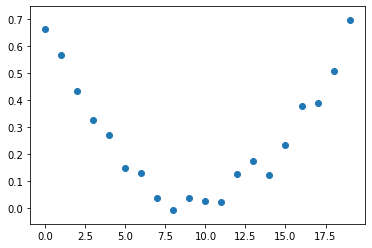

In [113]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

n = 20
time = np.arange(0, n, 1.0)
data = 0.01 * (np.random.randn(n)*3 + 0.75*(time - 9.5) ** 2 + 1)



fig, ax = plt.subplots()
ax.scatter(time, data)

plt.show()

In [120]:
target_a = 0.0075
target_b = -19 * 0.0075
target_c = 0.0075 * (9.5 ** 2) + .01

In [74]:
def f(t, params):
    a,b,c = params
    return a * (t**2) + b * t + c

In [75]:
def mse(preds, actual):
    return np.square(preds-actual).mean()

In [154]:
def loss(xs, params, actual):
    return mse(f(xs, params), actual)

In [161]:
def calc_grads(xs, preds, params, actual):
    grads = np.array([0,0,0])
    err = preds - actual
    
    # analytic gradient is wrong
    grads[0] = (err * (xs ** 2 * params[0])).mean()
    grads[1] = (err * xs * params[1]).mean()
    grads[2] = (err * params[2]).mean()
    
    
    #d/da (mse(f(x,a,b,c), s(x))) = d/da (E(f - s)^2) = 2 * E(f - s) * f'
    
    
    true_loss = loss(xs, params, actual)
    print("Current loss:", true_loss)
    
    # gradient check
    gradsc = np.array([0.,0.,0.])
    d = 0.001
    paramsa = params + np.array([d,0.,0.])
    paramsb = params + np.array([0.,d,0.])
    paramsc = params + np.array([0.,0.,d])
    gradsc[0] = (loss(xs, paramsa, actual) - true_loss) / d
    gradsc[1] = (mse(f(xs, paramsb), actual) - true_loss) / d
    gradsc[2] = (mse(f(xs, paramsc), actual) - true_loss) / d
    
    #print("analytic gradient:", grads)
    #print("numeric gradient:", gradsc)
    #print("gradient check:", mse(grads, gradsc))
    return gradsc

In [136]:
def update_params(params, grads, lr):
    return params - lr * grads

In [150]:
def one_step(params, lr):
    preds = f(time, params)
    grads = calc_grads(time, preds, params, data)
    print("Current grads:", grads)
    #print(lr * grads)
    return update_params(params, grads, lr)

In [180]:
def show_preds(preds, actual, ax, a):
    ax.scatter(time, actual)
    ax.scatter(time, preds, color='red', alpha=a)
    #ax.set_ylim(-300, 100)

Current loss: 938.053908658211
Current grads: [-10222.31637617   -668.76313397    -46.9233032 ]
Current params: [ 0.0075     -0.1425      6.75576456]
Current loss: 36.7788535617929
Current grads: [1526.77946441  115.35871175   12.12992905]
Current params: [ 0.0075     -0.1425      5.54277165]
Current loss: 23.537900460323215
Current grads: [1227.1702168    92.31184655    9.70394324]
Current params: [ 0.0075     -0.1425      4.57237733]
Current loss: 15.063884554241435
Current grads: [987.48281872  73.87435439   7.76315459]
Current params: [ 0.0075     -0.1425      3.79606187]
Current loss: 9.640669637434497
Current grads: [795.73290025  59.12436067   6.21052368]
Current params: [ 0.0075    -0.1425     3.1750095]
Current loss: 6.169936301153835
Current grads: [642.33296548  47.32436568   4.96841894]
Current params: [ 0.0075     -0.1425      2.67816761]
Current loss: 3.9487663343123294
Current grads: [519.61301766  37.8843697    3.97473515]
Current params: [ 0.0075     -0.1425      2.280

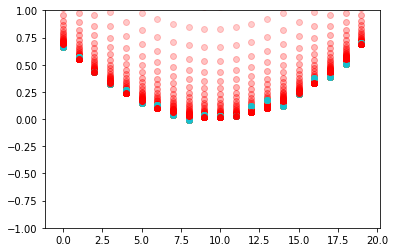

In [185]:
steps = 50
fig, ax = plt.subplots()
params = np.random.randn(3)
#params = (target_a, target_b, np.random.randn(1).item())
for i in range(steps):
    #print(params)
    show_preds(f(time,params), data, ax, i/steps)
    params = one_step(params, lr=np.array([1, .001, 0.1]))
    params[0] = target_a
    params[1] = target_b
    ax.set_ylim(-1, 1)
    print("Current params:", params)
plt.show()
#show_preds(f(time,params), data, plt.subplots()[1])
#print(time)

NameError: name 'beta_pdf' is not defined

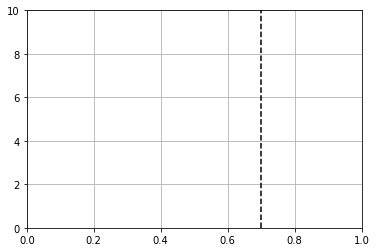

In [72]:
import math

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


class UpdateDist:
    def __init__(self, ax, prob=0.5):
        self.success = 0
        self.prob = prob
        self.line, = ax.plot([], [], 'k-')
        self.x = np.linspace(0, 1, 200)
        self.ax = ax

        # Set up plot parameters
        self.ax.set_xlim(0, 1)
        self.ax.set_ylim(0, 10)
        self.ax.grid(True)

        # This vertical line represents the theoretical value, to
        # which the plotted distribution should converge.
        self.ax.axvline(prob, linestyle='--', color='black')

    def __call__(self, i):
        # This way the plot can continuously run and we just keep
        # watching new realizations of the process
        if i == 0:
            self.success = 0
            self.line.set_data([], [])
            return self.line,

        # Choose success based on exceed a threshold with a uniform pick
        if np.random.rand(1,) < self.prob:
            self.success += 1
        y = beta_pdf(self.x, self.success + 1, (i - self.success) + 1)
        self.line.set_data(self.x, y)
        return self.line,

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, ax = plt.subplots()
ud = UpdateDist(ax, prob=0.7)
anim = FuncAnimation(fig, ud, frames=100, interval=100, blit=True)
#plt.show()

from IPython.display import HTML
HTML(anim.to_jshtml())